In [2]:
pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=3619d0dbd8e1957a684552b720b8f12a1d124e26d60afa7193e0a90ab367eb5a
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


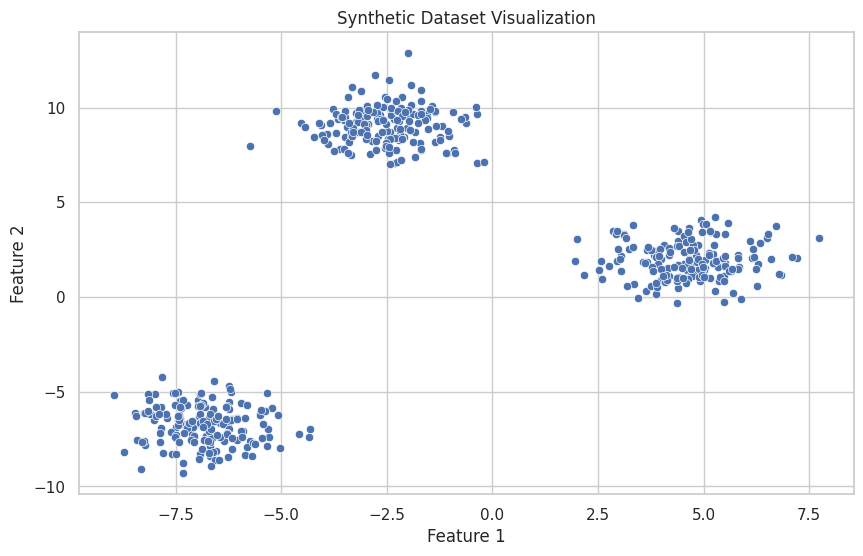

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from pyod.models.knn import KNN

# Set aesthetic parameters for seaborn
sns.set(style="whitegrid")

# Generating synthetic dataset
n_samples = 500
n_features = 2  # Number of features
centers = 3    # Number of clusters

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=42)

# Converting array to pandas DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# Plotting the generated dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature_1', y='Feature_2')
plt.title('Synthetic Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


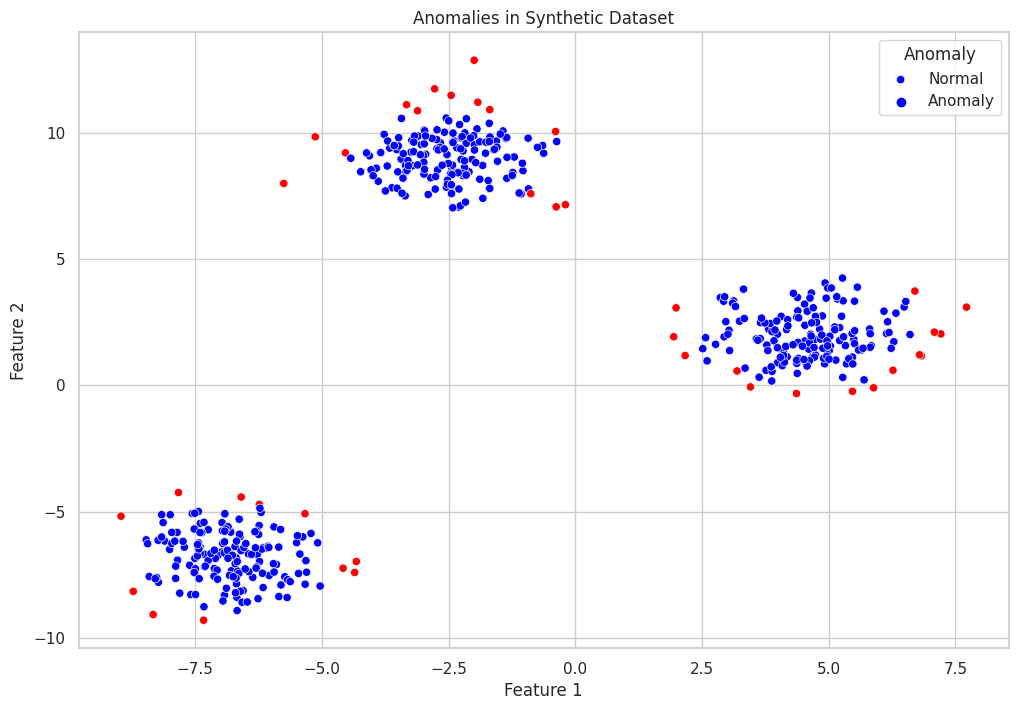

In [4]:
# Setting up the PyOD KNN model
# KNN is chosen for its simplicity and effectiveness in detecting outliers
knn = KNN()

# Fitting the model on the dataset
knn.fit(df)

# Predicting anomalies in the dataset
# The model will label each point as 1 (anomaly) or 0 (normal)
outlier_predictions = knn.predict(df)

# Adding the predictions to the dataframe for visualization
df['Anomaly'] = outlier_predictions

# Visualizing the data with predicted anomalies
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='Anomaly', palette=['blue', 'red'])
plt.title('Anomalies in Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()


In [5]:
from sklearn.metrics import classification_report

# Assuming we have a ground truth for anomalies in the synthetic dataset
# Since it's a synthetic dataset, for demonstration, we'll consider the actual labels as random
# In a real scenario, these labels would be based on actual anomalous behavior
import numpy as np
actual_anomalies = np.random.randint(0, 2, size=n_samples)

# Generating a classification report
print("\nClassification Report:")
print(classification_report(actual_anomalies, df['Anomaly']))



Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.91      0.64       248
           1       0.42      0.07      0.12       252

    accuracy                           0.48       500
   macro avg       0.46      0.49      0.38       500
weighted avg       0.46      0.48      0.37       500



Confusion matrix, without normalization
Normalized confusion matrix


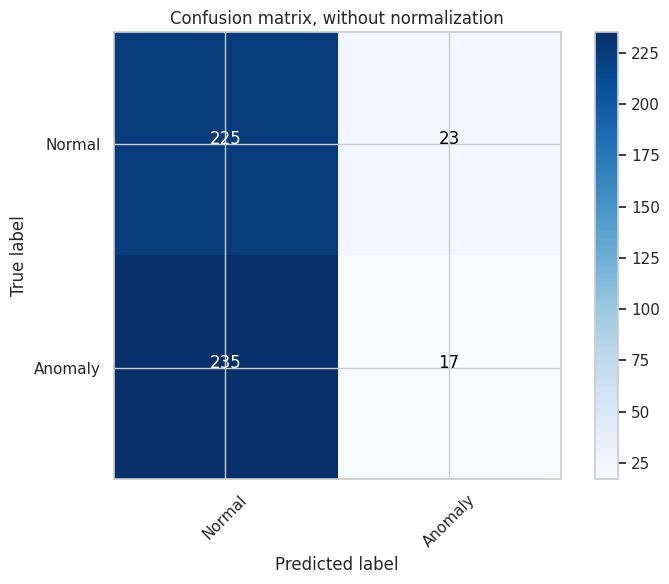

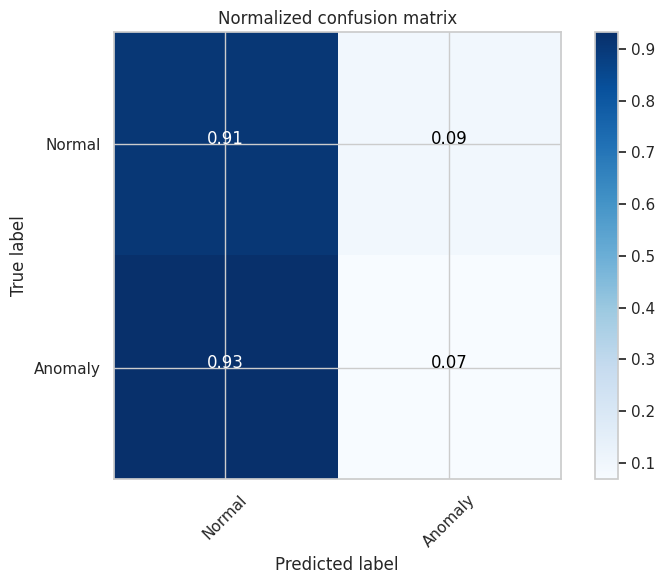

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_anomalies, df['Anomaly'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Anomaly'], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Anomaly'], normalize=True, title='Normalized confusion matrix')

plt.show()
